# А/В ТЕСТ

# Описание проекта
В этом проекте использованы данные крупного интернет-магазина. Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.

Цели исследования:
1. Сделать приоритизацию гипотез.
2. Проанализировать результаты А/В теста и принять решение о продолжение теста.

## Импорт библиотек

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np
pd.set_option('display.max_colwidth', None)
import scipy.stats as stats

## Чтение файлов

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
orders = pd.read_csv('/datasets/orders.csv')

In [4]:
visitors = pd.read_csv('/datasets/visitors.csv')

## Изучение и подготовка данных

In [5]:
#функция выводит общую информацию о таблице
def general_info(df):
    display(df.head())
    print('Общая информация:')
    print(df.info())
    print('Kоличество пропусков: ')
    print(df.isna().sum())
    print('Kоличество явных дубликатов: ', df.duplicated().sum())

### Работа с таблицей hypothesis

В таблице hypothesis 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [6]:
#выведу таблицу
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Описание таблицы:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [7]:
#general_info(hypothesis)

В ячейке выше проверила таблицу на соответствие типов, пропуски и дкубликаты. Предобработка не нужна.
<br>Название колонок не в нижнем регистре, пробелов нет, поэтому оставлю так.

### Работа с таблицей orders

In [8]:
general_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
Kоличество пропусков: 
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Kоличество явных дубликатов:  0


Описание таблицы:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Из предобработки - нужно привести дату к формату даты.

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [11]:
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Проверю доли по количеству посетителей по группам

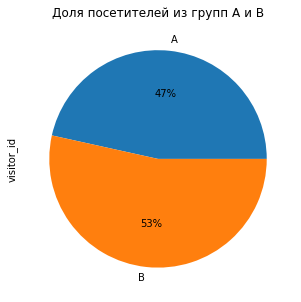

In [12]:
orders_d = orders.pivot_table(index='group', values='visitor_id', aggfunc='count')
orders_d.plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(5,5), legend=False)
plt.title('Доля посетителей из групп А и В')
plt.show();

Группа А - 47%, В - 53%.

Доли по количеству посетителей по группам

In [13]:
dff = visitors.groupby('group', as_index=False).agg({'visitors': 'sum'})
dff['per_visitors_of_total'] = dff['visitors'].map(lambda x: '{:.2%}'.format(x/dff['visitors'].sum()))
dff

,group,visitors,per_visitors_of_total
0,A,18736,49.76%
1,B,18916,50.24%


На входе такая информация о посетителях, различия менее 1%

Найду пересечение пользователей

,visitor_id
group,
1,973
2,58


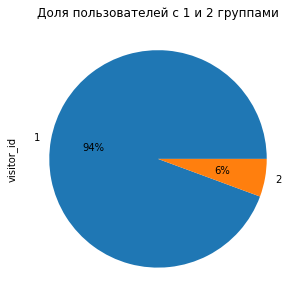

In [14]:
#сначала нашла сколько групп у пользователей, а затем посчитала сколько пользователей с 1 и 2 группами
group_user = orders.groupby('visitor_id', as_index=False).agg({'group': 'nunique'})\
                   .pivot_table(index='group', values='visitor_id', aggfunc='nunique')
display(group_user)
group_user.plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(5,5), legend=False)
plt.title('Доля пользователей с 1 и 2 группами')
plt.show();

Пользователей, которые попали сразу в 2 группы - 58, это 6%.

Таких пользователей лучше удалить, но в нашем случае мы можем удалять только из заказов, таблица визитов агрегирована, поэтому удалять не требуется.

### Работа с таблицей visitors

In [15]:
general_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
Kоличество пропусков: 
date        0
group       0
visitors    0
dtype: int64
Kоличество явных дубликатов:  0


Описание таблицы:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Из предобработки - нужно привести дату к формату даты.

In [16]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### Вывод:
данные готовы к исследованию

## Приоритизация гипотез

### Фреймворк ICE 

Применю фреймворк ICE для приоритизации гипотез

Формула ICE:
$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [17]:
hypothesis = hypothesis.set_index(pd.Series(range(9))).reset_index(drop=False).rename(columns={'index': 'hipothesis_number'})
display(hypothesis)

,hipothesis_number,Hypothesis,Reach,Impact,Confidence,Efforts
0,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [18]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
# добавила место по ICE
hypothesis_ice = hypothesis.sort_values(by='ICE', ascending=False).set_index(pd.Series(range(1, 10))).reset_index()\
                           .rename(columns={'index': 'i'})[['i', 'hipothesis_number']]

hypothesis = hypothesis.merge(hypothesis_ice, on='hipothesis_number')

display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE: 8, 0, 7.

### Фреймворк RICE 

Применю фреймворк RICE для приоритизации гипотез

Формула RICE:
$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [19]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
# добавила место по RICE
hypothesis_rice = hypothesis.sort_values(by='RICE', ascending=False).set_index(pd.Series(range(1, 10))).reset_index()\
                           .rename(columns={'index': 'r'})[['r', 'hipothesis_number']]

hypothesis = hypothesis.merge(hypothesis_rice, on='hipothesis_number')

display(hypothesis[['Hypothesis', 'Reach', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,3.00


Наиболее перспективные гипотезы по RICE: 7, 2, 0.

7 гипотеза с 3 места переместилась на 1, потому что у нее максимальный Reach=10.
<br> 2 с 5 места переместилась на 2, потому что ее Reach=8.
<br> Высокий Reach=8 у 3 гипотезы, но у нее низкий ICE, 8 место.

### Вывод
Приоритизация гипотез по RICE (7, 2, 0) и ICE (8, 0, 7) не совпали, из-за высокого охвата у 7 и 2.

In [20]:
hypothesis

,hipothesis_number,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,i,RICE,r
0,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,2,40.00,3
1,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,6,4.00,7
2,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,5,56.00,2
3,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8,9.00,6
4,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,9,3.00,9
5,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,7,4.00,8
6,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,4,40.00,4
7,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,3,112.00,1
8,8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,1,16.20,5


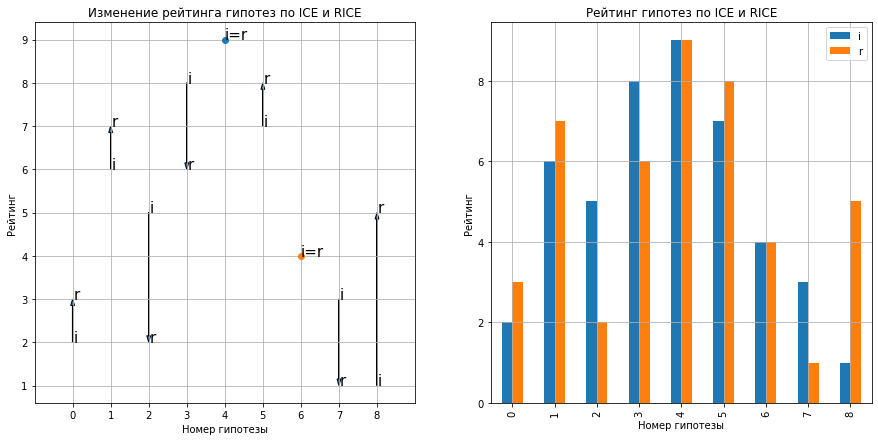

In [21]:
plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
for  ind in hypothesis.hipothesis_number:
      
    i = hypothesis.loc[ind, 'i']
    r = hypothesis.loc[ind, 'r']
    if r != i:
        plt.arrow(ind, i, 0, r-i, head_width = 0.1, length_includes_head = True, width = 0.01)
        plt.text(ind+0.02, i, 'i', fontsize=15)
        plt.text(ind+0.02, r, 'r', fontsize=15)
    else:
        plt.plot(ind, i, marker='o')
        plt.text(ind, i, 'i=r', fontsize=15)
plt.grid(True)
plt.xlim(-1, 9)
plt.xticks(range(len(hypothesis)))
plt.title('Изменение рейтинга гипотез по ICE и RICE')
plt.xlabel('Номер гипотезы')
plt.ylabel('Рейтинг')

ax2 = plt.subplot(1, 2, 2)
hypothesis.plot(x='hipothesis_number', y=['i', 'r'], kind='bar', grid=True, 
                        title='Рейтинг гипотез по ICE и RICE', ax=ax2)
plt.xlabel('Номер гипотезы')
plt.ylabel('Рейтинг')
plt.show(); 

## Анализ A/B-теста

### Анализ кумулятивной выручки по группам

Сначала соберу кумулятивные данные в датафрейм.

In [22]:
# создаю массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

In [23]:
# получаю агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                              .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 
                                    'revenue' : 'sum'}), axis=1)\
                              .sort_values(by=['date','group'])

In [24]:
# получаю агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])]\
                                .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                .sort_values(by=['date','group'])

In [25]:
# объединяю кумулятивные данные в одной таблице и присваиваю ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [26]:
#Датафрейм с кумулятивными данными
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Описание таблицы:
- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Чтобы построить графики кумулятивной выручки по дням и группам A/B-тестирования, нужно разделить датафрейм на 2 по группам.

In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

In [28]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

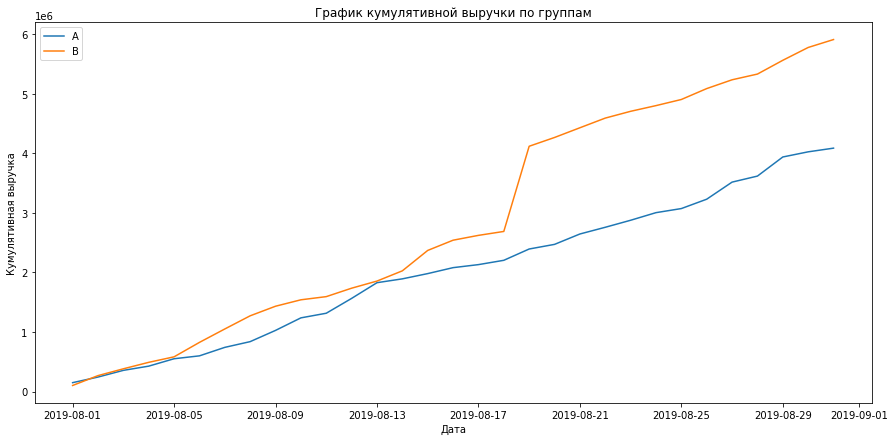

In [29]:
# Строю графики
plt.figure(figsize=(15, 7))
# график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.title('График кумулятивной выручки по группам');

#### Вывод:
1. В группе А выручка равномерно увеличивается в течение всего теста.
2. В группе В есть резкий скачок 18.08.19. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.
3. Выручка группы В выше выручки группы А.

### Анализ кумулятивного среднего чека по группам

Чтобы построить график среднего чека по группам — разделю кумулятивную выручку на кумулятивное число заказов

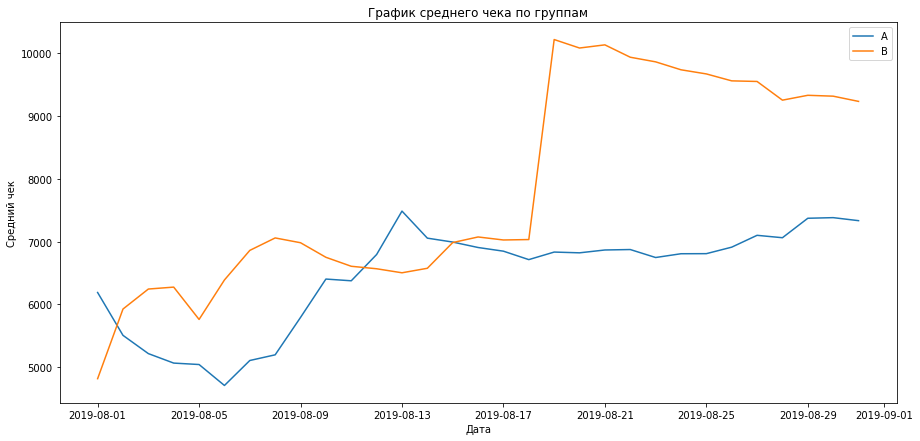

In [30]:
plt.figure(figsize=(15, 7))

# график среднего чека группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
# график среднего чека группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График среднего чека по группам');

#### Вывод:
1. В начале теста есть спад, а затем рост среднего чека для группы А, но к концу теста он становится равномерным.
2. Для группы В есть резкий скачок 18.08.19, видимо, в эту дату были крупные заказы. После этого график пошел на спад.
Поэтому группе В нужно больше времени, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Анализ изменения кумулятивного среднего чека группы B к группе A

In [31]:
# собираю данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', 
                                                   suffixes=['_a', '_b'])

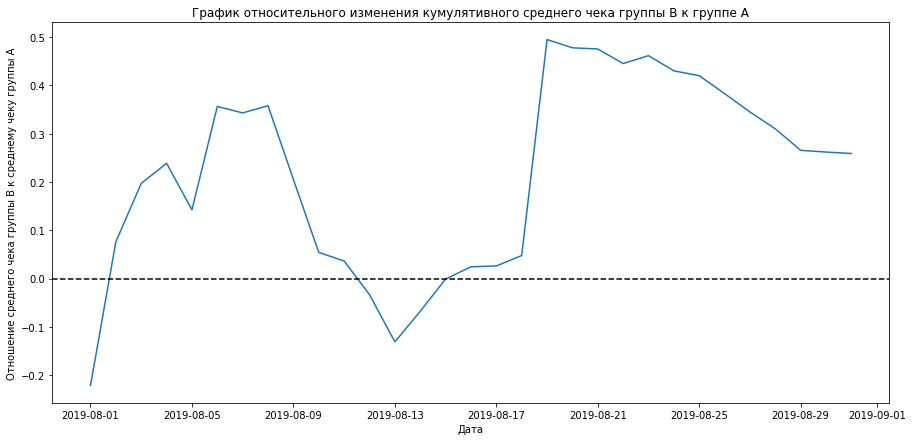

In [32]:
# строю график

plt.figure(figsize=(15, 7))

# cтрою отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], ((merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/
                                           (merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1))

# добавляю ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы В к среднему чеку группы А')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

#### Вывод:
В нескольких точках график различия между сегментами резко меняется. Значит, есть крупные заказы и выбросы.

### Анализ кумулятивной конверсии по группам

In [33]:
# считаю кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяю данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяю данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

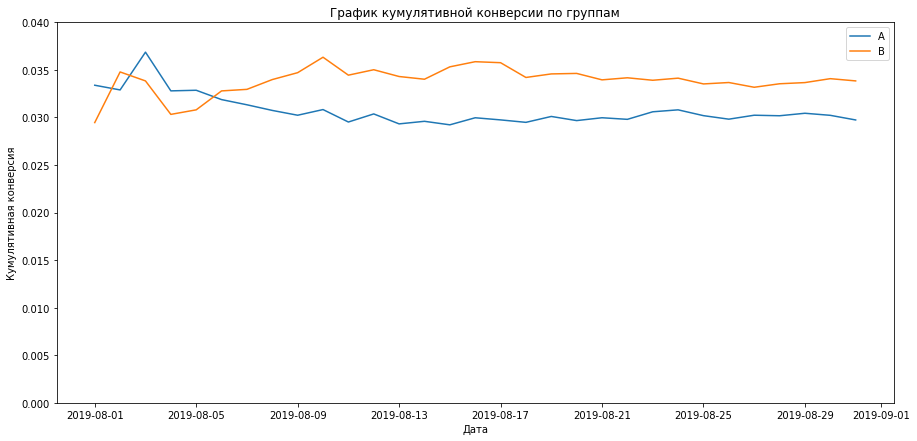

In [34]:
# строю графики

plt.figure(figsize=(15, 7))

plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()


plt.ylim(0, 0.04) 
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.title('График кумулятивной конверсии по группам');

#### Вывод:
Сначала в обеих группах был скачок. Затем конверсия в группах установилась около одного значения, при этом конверсия группы A просела, стала ниже, чем в В. Конверсия группы B выросла и потом зафиксировалась.

### Анализ относительного изменения кумулятивной конверсии группы B к группе A

In [35]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], 
                                                                           left_on='date', right_on='date', how='left', 
                                                                           suffixes=['_a', '_b'])

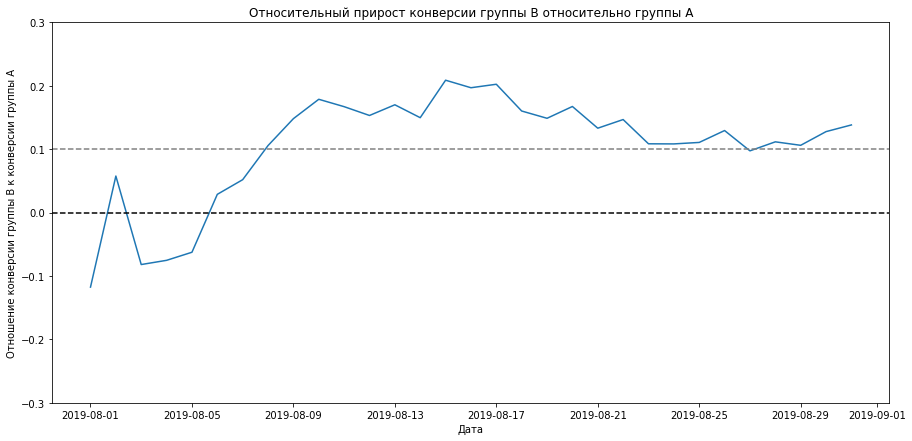

In [36]:
# строю график

plt.figure(figsize=(15, 7))

plt.plot(merged_cumulative_conversions['date'], (merged_cumulative_conversions['conversion_b']/
                                               merged_cumulative_conversions['conversion_a']-1))

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.ylim(-0.3, 0.3) 
plt.xlabel('Дата')
plt.ylabel('Отношение конверсии группы В к конверсии группы А')
plt.title('Относительный прирост конверсии группы B относительно группы A');

#### Вывод:
В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова стала падать. 
Отношение конверсии ещё не установилось, поэтому делать какие-либо выводы по тесту нельзя. Нужно проанализировать аномалии.

### Анализ количества заказов по пользователям

In [37]:
# количество заказов по пользователям
orders_by_users = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
orders_by_users.columns = ['user_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head()

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


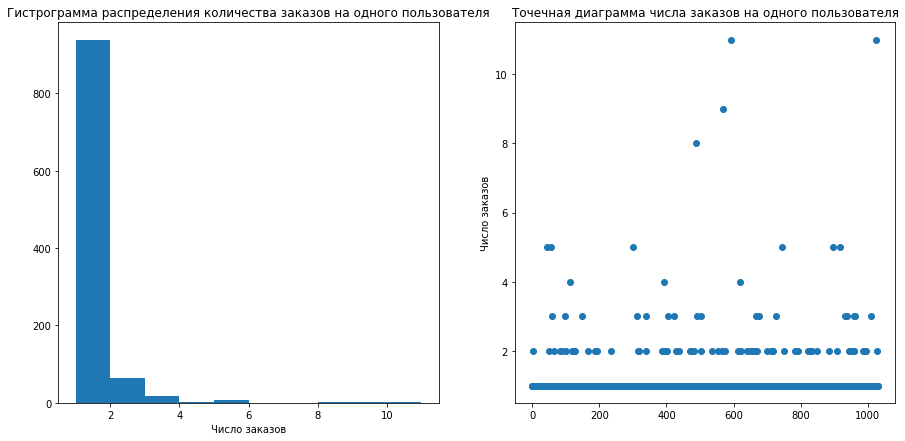

In [38]:
# построю гистограмму и скаттерплот
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1, 2, 1)
plt.hist(orders_by_users['orders'])
plt.xlabel('Число заказов')
plt.title('Гистрограмма распределения количества заказов на одного пользователя')

ax2 = plt.subplot(1, 2, 2)
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders']) 
plt.ylabel('Число заказов')
plt.title('Точечная диаграмма числа заказов на одного пользователя');

#### Вывод:
Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### Выбор границы для определения аномальных пользователей

Посчитаю 95-й и 99-й перцентили количества заказов на пользователя

In [39]:
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[2. 4.]


#### Вывод:
Не более 1% пользователей оформляли больше чем 4 заказа. И 5% пользователей заказывали не более 2 раз.
Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Анализ стоимости заказов

Выведу топ-5 дорогих заказов

In [40]:
orders['revenue'].sort_values(ascending=False).head()

425     1294500
1196     202740
858       93940
1136      92550
744       86620
Name: revenue, dtype: int64

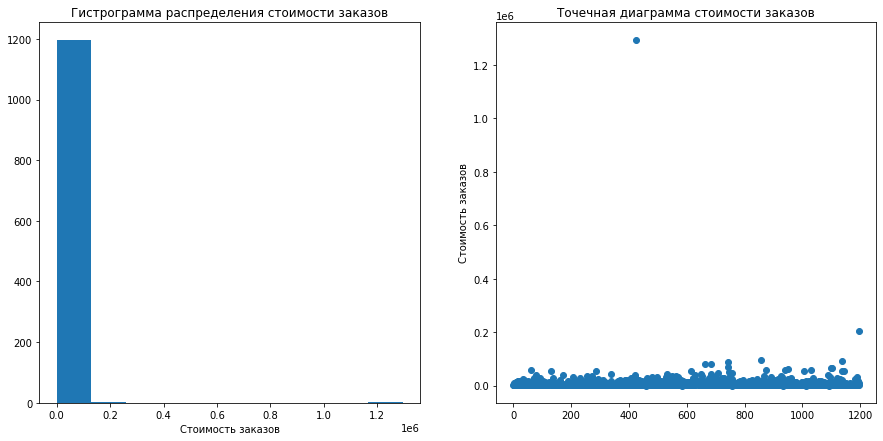

In [41]:
# построю гистограмму и скаттерплот
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1, 2, 1)
plt.hist(orders['revenue'])
plt.xlabel('Стоимость заказов')
plt.title('Гистрограмма распределения стоимости заказов')

ax2 = plt.subplot(1, 2, 2)
x_values = pd.Series(range(0, len(orders)))
plt.scatter(x_values, orders['revenue']) 
plt.ylabel('Стоимость заказов')
plt.title('Точечная диаграмма стоимости заказов');

#### Вывод:
В данных есть заказы дороже 20 000 — например, около 120 000 рублей. Однако большинство всё-таки имеет меньшую выручку.Всё, как предполагали: есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов до 20 000.

### Выбор границы для определения аномальных заказов

Посчитаю 95-й и 99-й перцентили стоимости заказов

In [42]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


#### Вывод:
Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233.2 рублей. Границу аномальных заказов оставлю до 20000.

### Анализ статистической значимости различий в конверсии между группами по «сырым» данным

Для расчета статичтической значимости я буду использовать непараметрический тест Уилкоксона-Манна-Уитни, чтобы исключить влияние выбросов на результат.
<br> В Python этот тест реализован в методе stats.mannwhitneyu() в библиотеке scipy.stats.
<br> Критический уровень стат значимости приму = 5%.

Для расчета статистической значимости нужно подготовить данные

In [43]:
# создаю массив уникальных пар значений дат и посетителей группы А
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# получаю агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_a_cummulative = visitors_a_daily.apply(lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']]
                                                                    .agg({'date': 'max', 'visitors_per_date_a': 'sum'}), axis=1,)
visitors_a_cummulative.columns = ['date', 'visitorsCummulative_a']

visitors_a_cummulative.head()

,date,visitorsCummulative_a
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [44]:
# создаю массив уникальных пар значений дат и посетителей группы B
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# получаю агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_b_cummulative = visitors_b_daily.apply(lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']]
                                                                    .agg({'date': 'max', 'visitors_per_date_b': 'sum'}), axis=1,)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

visitors_b_cummulative.head()

,date,visitors_cummulative_b
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [45]:
# получаю данные заказов по датам для группы А
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# получаю агрегированные кумулятивные по дням данные о заказах для группы А
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = ['date', 'orders_cummulative_a', 'revenue_cummulative_a']

In [46]:
# получаю данные заказов по датам для группы B
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# получаю агрегированные кумулятивные по дням данные о заказах для группы B
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']

In [47]:
# объединяю данные о пользователях и заказах
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitorsCummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Описание таблицы:
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.


Посчитаю статистическую значимость различия в конверсии между группами.
Создам переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажу число совершённых заказов.

In [48]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders'] 

Объявлю переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [49]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулирую гипотезы:
- Нулевая: различий в конверсии между группами нет.
- Альтернативная: различия в конверсии между группами есть.

Выведу p-value для сравнения средних чеков между группами и относительный прирост среднего чека группы B.

In [50]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("относительный прирост среднего чека группы B: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value: 0.017
относительный прирост среднего чека группы B: 0.138


#### Вывод: 
По «сырым» данным различия в конверсии групп A и B есть.
1. p-value = 0.017, т е меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 
2. Относительный прирост группы B равен 13.8%.

### Анализ статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Гипотезы:
- Нулевая гипотеза: различий в среднем чеке между группами нет.
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [51]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('отношение среднего чека группы В к среднему чеку группы А: {0:.3f}'\
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
отношение среднего чека группы В к среднему чеку группы А: 0.259


#### Вывод:
<br>
1. P-value значительно больше 0.05 — статистически значимых отличий в среднем чеке между группами нет.
<br>
2. Средний чек группы B больше среднего чека группы A на 25.9%.

### Анализ статистической значимости различий в конверсии между группами по «очищенным» данным

За аномальных пользователей возьму тех, кто совершил 3 заказа и более, или совершил заказ на сумму свыше 20 000. 

In [52]:
# срез пользователей с числом заказов больше 2
users_with_many_orders  = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'],
                                  orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id']],
                                 axis=0)

In [53]:
# срез пользователей, совершивших заказы дороже 20 000
users_with_expensive_orders = orders[orders['revenue'] > 20000]['visitor_id']
users_with_expensive_orders.columns = ['user_id']

In [54]:
# объединяю и удаляю дубликаты
abnormal_users = pd.concat(
    [
        users_with_many_orders, users_with_expensive_orders
    ], axis=0).drop_duplicates().sort_values()

Создам переменные sampleAFiltered и sampleBFiltered, в которых будут очищенные данные о заказах — не включая аномальных пользователей.

In [55]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулирую гипотезы:
- Нулевая: различий в конверсии между группами нет.
- Альтернативная: различия в конверсии между группами есть.

In [56]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

print("относительный прирост среднего чека группы B: {0:.3f}".format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

p-value: 0.018
относительный прирост среднего чека группы B: 0.170


#### Вывод:
Как и по сырым данным, p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем - различия есть.
<br>При этом относительный прирост группы B равен 17%.

### Анализ статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Гипотезы:
- Нулевая гипотеза: различий в среднем чеке между группами нет.
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [57]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "отношение среднего чека группы В к среднему чеку группы А: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.698
отношение среднего чека группы В к среднему чеку группы А: -0.030


#### Вывод:
<br>
1. Как и для сырых данных P-value значительно больше 0.05 — статистически значимых отличий в среднем чеке между группами нет.
<br>
2. Но! Теперь средний чек группы B меньше среднего чека группы A на 3%. 
<br>
Это значит, что после удаления выбросов в данных меньше шума; дисперсия снизилась, и различие в 3% по выручке статистически не значимо.

### Вывод:
1. В группе А выручка равномерно увеличивается в течение всего теста.
2. В группе В есть резкий скачок 18.08.19 - крупные заказы.
3. Выручка группы В выше выручки группы А.
4. В начале теста есть спад, а затем рост среднего чека для группы А, но к концу теста он становится равномерным.
5. Для группы В есть резкий скачок 18.08.19, после этого график пошел на спад.
Поэтому группе В нужно больше времени, чтобы прийти к реальному среднему чеку и установиться на его уровне.

6. По графику конверсии сначала в обеих группах был скачок. Затем конверсия в группах установилась около одного значения, при этом конверсия группы A просела, стала ниже, чем в В. Конверсия группы B выросла и потом зафиксировалась.

7. По анализу данных я определила границу аномальных заказов до 20000 и не более 2 заказов на одного пользователя.

8. По «сырым» данным различия в конверсии групп A и B есть. Относительный прирост группы B равен 13.8%.

9. Статистически значимых отличий в среднем чеке между группами нет. Средний чек группы B больше среднего чека группы A на 25.9%.

10. По отфильтрованным данным для конверсии статистическая значимость достигнута. При этом относительный прирост группы B равен 17%. Т е группа В лучше группы А.
11. Статистически значимых отличий в среднем чеке между группами нет. Но! Теперь средний чек группы B меньше среднего чека группы A на 3%. 
<br>
12. После удаления выбросов в данных меньше шума; дисперсия снизилась, и различие в 3% по выручке статистически не значимо.

<br> ***Конверсия достигла статистической значимости, разница между В и А в 17%! 
Статистически значимых отличий в среднем чеке между группами нет, даже для сырых данных.
Поэтому я рекомедую остановить тест, зафиксировать победу группы В.***

## Общий вывод:
1. Приоритизация гипотез по RICE (7, 2, 0) и ICE (8, 0, 7) не совпали, из-за высокого охвата у 7 и 2.
2. Конверсия достигла статистической значимости. Конверсия группы В на 17% лучше конверсии группы А.
Статистически значимых отличий в среднем чеке между группами нет, даже для сырых данных.
Поэтому я рекомедую остановить тест, зафиксировать победу группы В.